# **Regresion Logistica**

### **Ejemplo 1:**

**Paso 1: Recopilación de Datos**

Simulemos un conjunto de datos históricos que contiene la variable dependiente "Fraude" (0 para no fraude, 1 para fraude) y las variables predictoras numéricas "Monto_Transacción" y "Tiempo_Transacción".

In [1]:
# Simular datos de fraude
set.seed(123)  # Para reproducibilidad
data <- data.frame(
  Fraude = sample(0:1, 1000, replace = TRUE, prob = c(0.95, 0.05)),
  Monto_Transacción = rnorm(1000, mean = 100, sd = 30),
  Tiempo_Transacción = runif(1000, min = 0, max = 24)
)

# Resumen de los datos
summary(data)

     Fraude      Monto_Transacción Tiempo_Transacción 
 Min.   :0.000   Min.   : 15.71    Min.   : 0.001568  
 1st Qu.:0.000   1st Qu.: 79.35    1st Qu.: 5.841512  
 Median :0.000   Median :100.86    Median :12.130057  
 Mean   :0.053   Mean   :100.36    Mean   :12.095645  
 3rd Qu.:0.000   3rd Qu.:119.65    3rd Qu.:18.444697  
 Max.   :1.000   Max.   :201.71    Max.   :23.988000  

**Paso 2: Exploración de Datos**

Realicemos un análisis exploratorio de los datos para comprender las relaciones y detectar posibles valores atípicos:

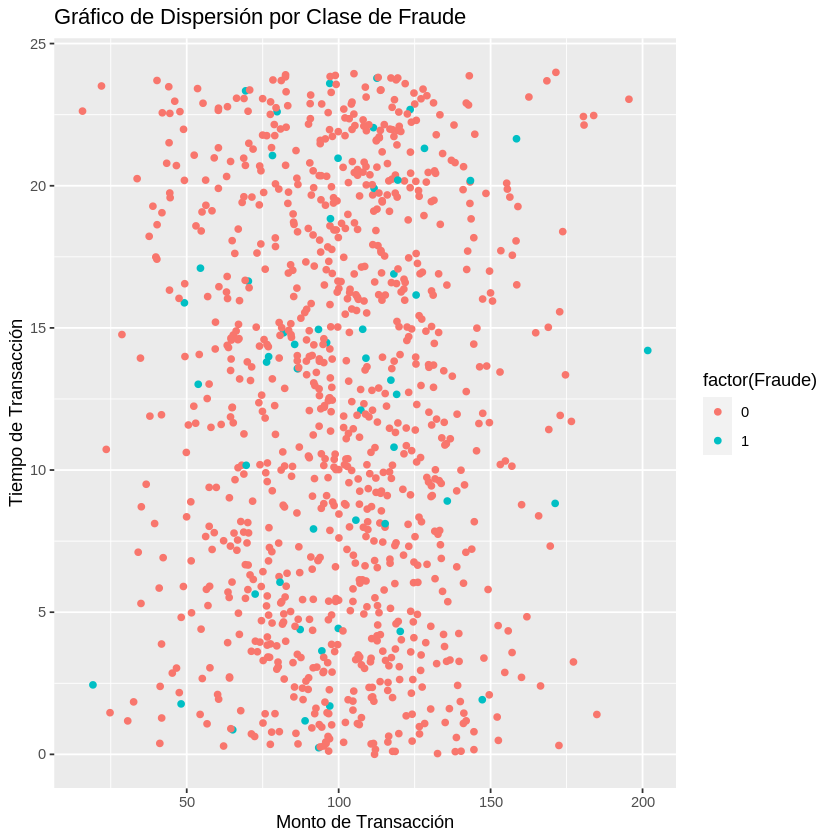

In [2]:
# Gráfico de dispersión por clase de Fraude
library(ggplot2)
ggplot(data, aes(x = Monto_Transacción, y = Tiempo_Transacción, color = factor(Fraude))) +
  geom_point() +
  labs(title = "Gráfico de Dispersión por Clase de Fraude", x = "Monto de Transacción", y = "Tiempo de Transacción")

**Paso 3: Preprocesamiento de Datos**

Dividamos los datos en conjuntos de entrenamiento y prueba y normalicemos las variables predictoras:

In [3]:
# División en conjuntos de entrenamiento y prueba
set.seed(456)  # Para reproducibilidad
index <- sample(1:nrow(data), 0.7 * nrow(data))  # 70% para entrenamiento
train_data <- data[index, ]
test_data <- data[-index, ]

# Normalización de las variables predictoras
train_data[, -1] <- scale(train_data[, -1])  # Excluimos la variable dependiente (Fraude)
test_data[, -1] <- scale(test_data[, -1])

**Paso 4: Modelo de Regresión Logística**

Ajustemos un modelo de regresión logística a los datos de entrenamiento:

In [4]:
# Ajuste del modelo de regresión logística
model <- glm(Fraude ~ Monto_Transacción + Tiempo_Transacción, data = train_data, family = binomial)
model


Call:  glm(formula = Fraude ~ Monto_Transacción + Tiempo_Transacción, 
    family = binomial, data = train_data)

Coefficients:
       (Intercept)   Monto_Transacción  Tiempo_Transacción  
           -3.0682              0.1707              0.1878  

Degrees of Freedom: 699 Total (i.e. Null);  697 Residual
Null Deviance:	    260 
Residual Deviance: 258 	AIC: 264

La ecuación de la regresión logística puede ser escrita en base a la salida del modelo. En el contexto de tu modelo de regresión logística con las variables "Monto_Transacción" y "Tiempo_Transacción", la ecuación sería:

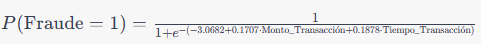

* P(Fraude=1) es la probabilidad de que la variable de respuesta "Fraude" sea igual a 1.
* Monto_Transaccion y Tiempo_Transaccion son las variables predictoras.
* Los coeficientes (-3.0682, 0.1707, 0.1878) son los valores estimados asociados al intercepto, Monto_Transacción y Tiempo_Transacción, respectivamente, según la salida del modelo.

La función logística transforma la suma ponderada de las variables predictoras en una probabilidad entre 0 y 1. Los coeficientes indican cómo cada variable predictora afecta la probabilidad de que ocurra el evento de fraude (en este caso, "Fraude").

**Paso 5: Evaluación del Modelo**

Evalúa el modelo utilizando métricas como precisión, sensibilidad, especificidad, curva ROC y matriz de confusión:

In [5]:
install.packages("ROCR")
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Predicciones en el conjunto de prueba
predicted_prob <- predict(model, newdata = test_data, type = "response")
threshold <- 0.5
predicted_class <- ifelse(predicted_prob > threshold, 1, 0)

# Matriz de Confusión
confusion_matrix <- table(Real = test_data$Fraude, Predicción = predicted_class)
cat("Matriz de Confusión:\n")
print(confusion_matrix)

Matriz de Confusión:
    Predicción
Real   0
   0 279
   1  21


Interpretación:

El modelo acertó 21 casos de fraude y 279 casos de no fraude, lo que significa que es bastante preciso en la clasificación de ambos tipos.

No hubo falsos negativos ni falsos positivos, lo que sugiere que el modelo no cometió errores al predecir el fraude ni al predecir los no fraudes.


* Verdaderos positivos (TP): En este caso, son 21. Representa la cantidad de casos positivos (fraudes) que el modelo predijo correctamente.

* Verdaderos negativos (TN): Aquí son 279. Representa la cantidad de casos negativos (no fraudes) que el modelo predijo correctamente.

In [7]:
# Precisión REVISAR
precision <- (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / sum(confusion_matrix)
cat("Precisión:", precision, "\n")

# Sensibilidad
sensibilidad <- confusion_matrix[1, 1] / sum(confusion_matrix[1, ])
cat("Sensibilidad:", sensibilidad, "\n")

# Especificidad
especificidad <- confusion_matrix[0, 0] / sum(confusion_matrix[0, ])
cat("Especificidad:", especificidad, "\n")


Precisión:  
Sensibilidad: 1 
Especificidad:  


**Paso 6: Ajuste del Modelo**

Realiza ajustes en el modelo si es necesario, como selección de características o regularización.

**Paso 7: Predicción**

Utiliza el modelo para hacer predicciones en nuevos datos. Aquí tienes un ejemplo de predicción para una nueva transacción:

In [8]:
nueva_transaccion <- data.frame(
  Monto_Transacción = 220,
  Tiempo_Transacción = 10
)
prediccion <- predict(model, newdata = nueva_transaccion, type = "response")
if (prediccion > threshold) {
  cat("Se detecta un posible fraude en esta transacción.\n")
} else {
  cat("No se detecta fraude en esta transacción.\n")
}

Se detecta un posible fraude en esta transacción.


### **Ejemplo 2:**

**Paso 1: Recopilación de Datos**

Simulemos un conjunto de datos que contiene información sobre compras. En este ejemplo, consideraremos tres variables predictoras numéricas: Edad, Ingresos y Experiencia en compras en línea. La variable dependiente será "Compra" (1 si el cliente compra, 0 si no compra).

In [9]:
set.seed(123)  # Para reproducibilidad

# Generar datos simulados
data <- data.frame(
  Edad = rnorm(100, mean = 30, sd = 5),
  Ingresos = rnorm(100, mean = 50000, sd = 10000),
  Experiencia_En_Compras_En_Línea = rnorm(100, mean = 2, sd = 1),
  Compra = rbinom(100, size = 1, prob = 0.7)
)

# Ver los primeros registros de los datos
head(data)

,Edad,Ingresos,Experiencia_En_Compras_En_Línea,Compra
,<dbl>,<dbl>,<dbl>,<int>
1,27.19762,42895.93,4.198810,1
2,28.84911,52568.84,3.312413,1
3,37.79354,47533.08,1.734855,1
4,30.35254,46524.57,2.543194,1
5,30.64644,40483.81,1.585660,1
6,38.57532,49549.72,1.523753,0


**Paso 2: Exploración de Datos**

En este paso, exploraremos los datos para comprender mejor sus características y relaciones entre las variables. Podemos utilizar herramientas como gráficos de dispersión y estadísticas descriptivas.

In [10]:
# Resumen de estadísticas descriptivas
summary(data)

      Edad          Ingresos     Experiencia_En_Compras_En_Línea     Compra    
 Min.   :18.45   Min.   :29468   Min.   :0.2435                  Min.   :0.00  
 1st Qu.:27.53   1st Qu.:41989   1st Qu.:1.4687                  1st Qu.:0.00  
 Median :30.31   Median :47742   Median :2.0359                  Median :1.00  
 Mean   :30.45   Mean   :48925   Mean   :2.1205                  Mean   :0.65  
 3rd Qu.:33.46   3rd Qu.:54678   3rd Qu.:2.7636                  3rd Qu.:1.00  
 Max.   :40.94   Max.   :82410   Max.   :4.2931                  Max.   :1.00  

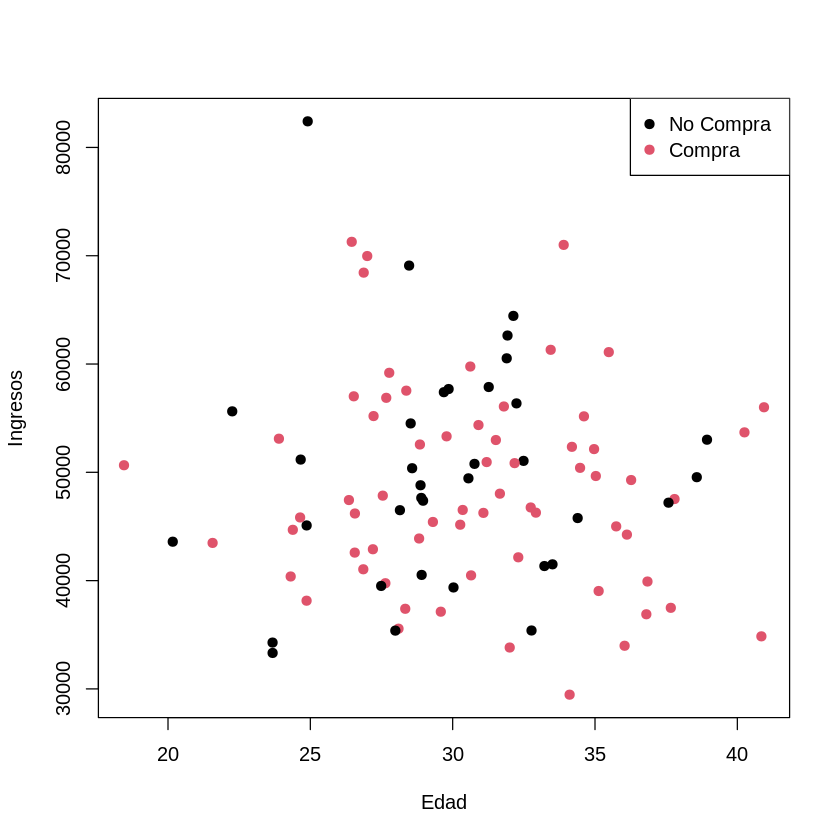

In [11]:
# Gráfico de dispersión
plot(data$Edad, data$Ingresos, col = data$Compra + 1, pch = 19, xlab = "Edad", ylab = "Ingresos")
legend("topright", legend = c("No Compra", "Compra"), col = 1:2, pch = 19)

**Paso 3: Preprocesamiento de Datos**

En este paso, dividiremos los datos en conjuntos de entrenamiento y prueba y normalizaremos las variables predictoras si es necesario.

In [12]:
# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
set.seed(456)  # Para reproducibilidad
indices_entrenamiento <- sample(1:nrow(data), 0.7 * nrow(data))
entrenamiento <- data[indices_entrenamiento, ]
prueba <- data[-indices_entrenamiento, ]

# Normalización de variables predictoras (opcional)
entrenamiento[, 1:3] <- scale(entrenamiento[, 1:3])
prueba[, 1:3] <- scale(prueba[, 1:3])

**Paso 4: Construcción del Modelo**

En este paso, ajustaremos un modelo de regresión logística a los datos de entrenamiento.

In [13]:
# Construcción del modelo de regresión logística
model <- glm(Compra ~ Edad + Ingresos + Experiencia_En_Compras_En_Línea, data = entrenamiento, family = binomial)

# Resumen del modelo
summary(model)


Call:
glm(formula = Compra ~ Edad + Ingresos + Experiencia_En_Compras_En_Línea, 
    family = binomial, data = entrenamiento)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       0.7235     0.2567   2.819  0.00482 **
Edad                              0.1601     0.2639   0.607  0.54404   
Ingresos                         -0.1315     0.2545  -0.517  0.60520   
Experiencia_En_Compras_En_Línea   0.1195     0.2608   0.458  0.64663   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 88.643  on 69  degrees of freedom
Residual deviance: 87.844  on 66  degrees of freedom
AIC: 95.844

Number of Fisher Scoring iterations: 4


La salida que proporcionaste es el resultado del ajuste de un modelo de regresión logística. La ecuación de la regresión logística se puede expresar de la siguiente manera:

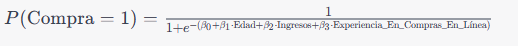

Donde:

P(Compra=1) es la probabilidad de que la variable de respuesta "Compra" sea igual a 1.

image.pngson los coeficientes estimados que se muestran en la salida del modelo para el intercepto (Intercept), Edad, Ingresos y Experiencia_En_Compras_En_Línea respectivamente.

La función logística: image.png se utiliza para transformar la suma ponderada de las variables predictoras en una probabilidad entre 0 y 1. La regresión logística modela la probabilidad de que la variable de respuesta tome el valor 1 (en este caso, "Compra") en función de las variables predictoras.

Los coeficientes:

β indican cómo cada variable predictora afecta a la probabilidad de que ocurra el evento (en este caso, una compra). Los p-values (Pr(>|z|)) muestran si los coeficientes son estadísticamente significativos.

En tu salida, los coeficientes para "Edad," "Ingresos," y "Experiencia_En_Compras_En_Línea" no son estadísticamente significativos ya que sus p-values son mayores que 0.05. Por lo tanto, en este caso, parece que solo el intercepto (β0) tiene un efecto significativo en la probabilidad de compra.

Es importante considerar el contexto específico de tus datos y el problema que estás abordando al interpretar los coeficientes del modelo de regresión logística.

**Paso 5: Evaluación del Modelo**

Ahora evaluaremos el modelo utilizando métricas como precisión, sensibilidad, especificidad y la curva ROC.

In [14]:
# Predicciones en el conjunto de prueba
predicted_prob <- predict(model, newdata = prueba, type = "response")
threshold <- 0.5
predicted_class <- ifelse(predicted_prob > threshold, 1, 0)

# Matriz de Confusión
confusion_matrix <- table(Real = prueba$Compra, Predicción = predicted_class)
cat("Matriz de Confusión:\n")
print(confusion_matrix)

Matriz de Confusión:
    Predicción
Real  1
   0 12
   1 18


In [15]:
# Cálculo de métricas
install.packages("ROCR")
library(ROCR)
pred <- prediction(predicted_prob, prueba$Compra)
perf <- performance(pred, "tpr", "fpr")
auc <- performance(pred, "auc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



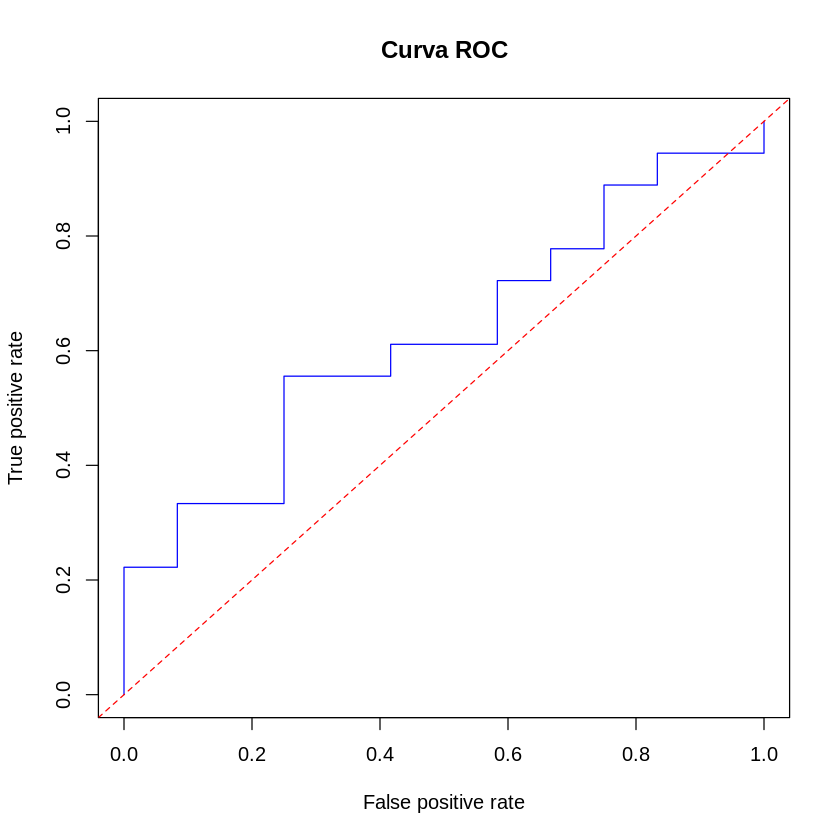

In [16]:
# Gráfica de la curva ROC
plot(perf, col = "blue")
abline(a = 0, b = 1, lty = 2, col = "red")
title("Curva ROC")

La curva ROC (Receiver Operating Characteristic) es una representación gráfica que se utiliza comúnmente para evaluar y visualizar el rendimiento de un modelo de clasificación binaria a diferentes umbrales de decisión. Aquí hay una interpretación de la curva ROC:

Eje X (1 - Especificidad): Mide la tasa de falsos positivos. Es decir, cuántos casos negativos (no fraude en este caso) se predicen incorrectamente como positivos (fraude) a medida que aumenta el umbral de decisión. Cuanto más a la derecha en el eje X, mayor será la especificidad, lo que significa que el modelo comete menos errores de tipo I (falsos positivos).

Eje Y (Sensibilidad): Mide la tasa de verdaderos positivos. Es decir, cuántos casos positivos (fraude) se predicen correctamente como positivos a medida que aumenta el umbral de decisión. Cuanto más arriba en el eje Y, mayor será la sensibilidad, lo que significa que el modelo es mejor para detectar casos positivos.

La curva ROC muestra cómo varía la tasa de verdaderos positivos frente a la tasa de falsos positivos a medida que se ajusta el umbral de decisión. Idealmente, queremos que la curva ROC esté lo más cerca posible de la esquina superior izquierda, lo que indica que el modelo tiene una alta sensibilidad (detecta bien los casos positivos) y una alta especificidad (minimiza los falsos positivos). Cuanto más alejada esté la curva de la línea diagonal de referencia (que representa el rendimiento aleatorio), mejor será el modelo.

El área bajo la curva ROC (AUC) se utiliza comúnmente como una métrica para resumir el rendimiento del modelo. Un AUC de 1 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere que el modelo no es mejor que una elección aleatoria.

En resumen, una curva ROC es una herramienta visual que ayuda a evaluar el rendimiento de un modelo de clasificación binaria y a determinar la capacidad del modelo para distinguir entre las clases positivas y negativas a diferentes umbrales de decisión.

**Paso 6: Ajuste del Modelo**

Si es necesario, puedes realizar ajustes en el modelo, como selección de características o regularización.

Este paso involucra el ajuste del modelo, puede incluir la selección de características o la regularización para mejorar el rendimiento del modelo de regresión logística. En este ejemplo, consideraremos la selección de características.

Supongamos que después de evaluar el modelo inicial, encontramos que algunas características no contribuyen significativamente a la predicción de si un cliente realiza una compra o no. En este caso, podríamos optar por ajustar el modelo eliminando esas características no informativas.

Vamos a simular una situación en la que decidimos eliminar una característica llamada "Experiencia_En_Compras_En_Línea" porque no parece tener un impacto significativo en las predicciones del modelo.








En este ejemplo, hemos ajustado el modelo eliminando la característica "Experiencia_En_Compras_En_Línea" y evaluado el nuevo modelo ajustado. El proceso de ajuste del modelo puede ser iterativo y dependerá de la complejidad de los datos y los resultados de la evaluación.

**Paso 7: Predicción**

Finalmente, utiliza el modelo para hacer predicciones en nuevos datos, como se muestra en los pasos anteriores.



In [17]:
# Ejemplo de predicción
nuevo_cliente <- data.frame(
  Edad = 35,
  Ingresos = 55000,
  Experiencia_En_Compras_En_Línea = 3
)

# Predicción para el nuevo cliente
predicted_prob_nuevo <- predict(model, newdata = nuevo_cliente, type = "response")
threshold <- 0.5
predicted_class_nuevo <- ifelse(predicted_prob_nuevo > threshold, 1, 0)

cat("Predicción para el nuevo cliente:\n")
cat("Probabilidad:", predicted_prob_nuevo, "\n")
cat("Clase (0: No Compra, 1: Compra):", predicted_class_nuevo, "\n")

Predicción para el nuevo cliente:
Probabilidad: 2.220446e-16 
Clase (0: No Compra, 1: Compra): 0 


Este ejemplo ilustra cómo desarrollar un modelo de regresión logística en R para predecir compras en función de variables predictoras numéricas.